<a href="https://colab.research.google.com/github/Shady91-ML/California_house_prices-ML/blob/main/Houses_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Import dataset


In [322]:
houses_dataset = sklearn.datasets.fetch_california_housing()

In [323]:
print(houses_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

#Data pre-processing

In [324]:
#Loading data to Panda's DataFrame
houses_df = pd.DataFrame(houses_dataset.data, columns = houses_dataset.feature_names)
#Add target to DataFrame
houses_df['Price']=houses_dataset.target

#checking new DataFrame
houses_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#Data analysis


In [325]:
#Checking shape of DataFrame
houses_df.shape

(20640, 9)

In [326]:
#Checking missing values
houses_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [327]:
#Statistical values
houses_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [328]:
#Correlation between features
correlation = houses_df.corr()

<Axes: >

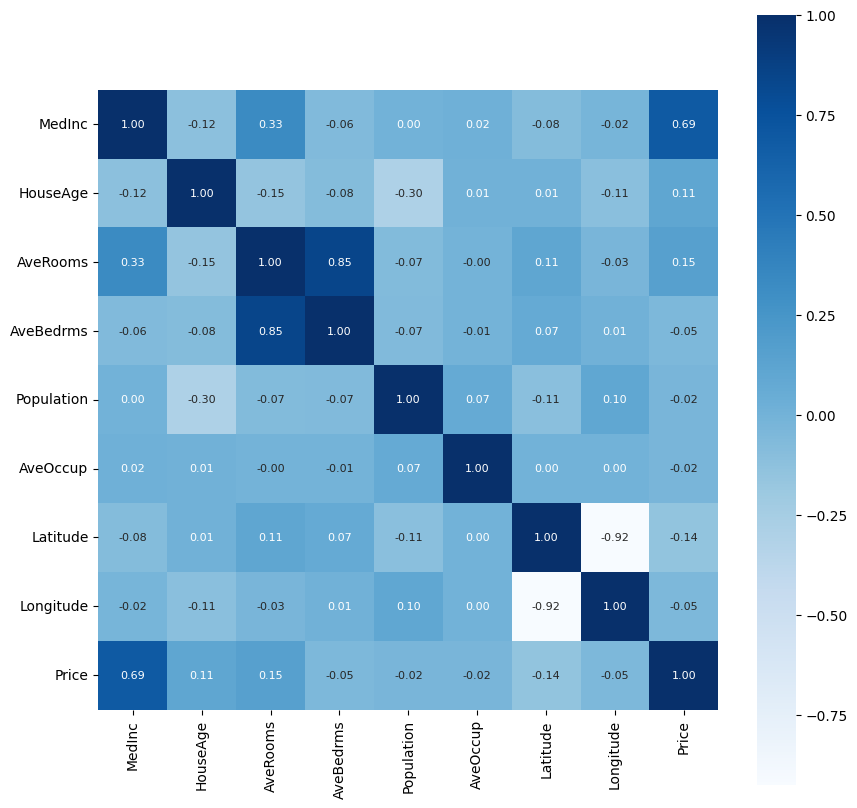

In [329]:
#Heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Split data


In [330]:
 #Spliting data for features and labels
  #Features
 X = houses_df.drop(['Price'], axis=1)
  #Labels
 Y = houses_df['Price']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1968)

#Model training

In [332]:
#Initializing ML model
model = XGBRegressor(n_estimator=2000, max_depth=10, learning_rate=0.2)

#Training model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=2000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Model evaluation

In [333]:
# Prediction on training data
prediction_train = model.predict(X_train)


#Prediction on test data
prediction_test = model.predict(X_test)

In [334]:
#Metrics for train data:
#R squared error
score_r_train = metrics.r2_score(y_train, prediction_train)
#Mean absolute error
score_mean_train = metrics.mean_absolute_error(y_train, prediction_train)
print('R squared error for train data:', score_r_train)
print('Mean absolute error for train data:', score_mean_train)

R squared error for train data: 0.9949106828228215
Mean absolute error for train data: 0.056548607399083614


In [335]:
#Metrics for test data:
#R squared error
score_r_test = metrics.r2_score(y_test, prediction_test)
#Mean absolute error
score_mean_test = metrics.mean_absolute_error(y_test, prediction_test)
print('R squared error for train data:', score_r_test)
print('Mean absolute error for train data:', score_mean_test)

R squared error for train data: 0.8158871078412625
Mean absolute error for train data: 0.31436225297286063


#Visualization

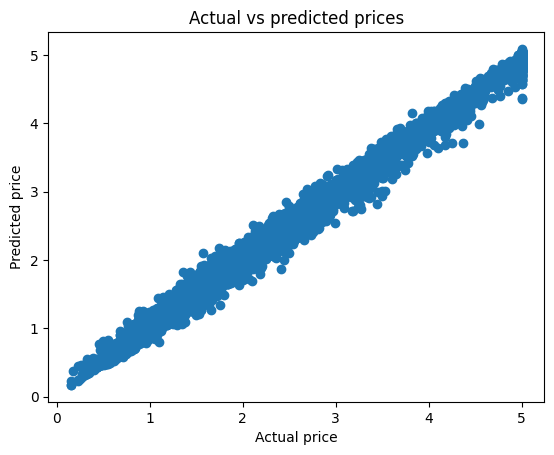

In [336]:
plt.scatter(y_train, prediction_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices')
plt.show()